<a href="https://colab.research.google.com/github/Sudeepkumar0/lab/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     class  
0        0  
1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


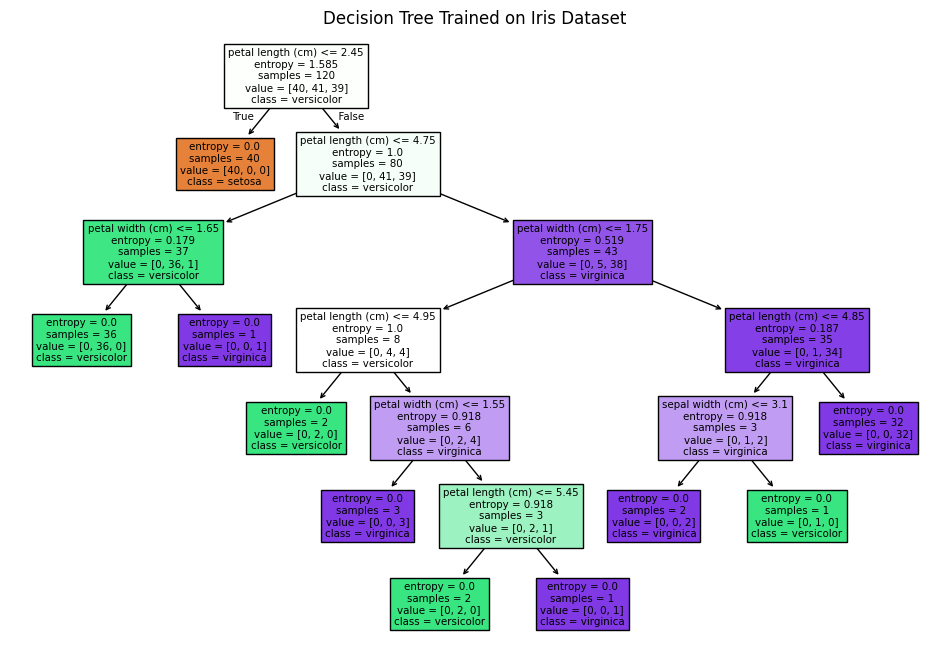

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target


print(df)

# Display missing values (if any)
print("Missing values in each column:")
print(df.isnull().sum())

# Split features and target
X = df.drop('class', axis=1)
y = df['class']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Evaluate model accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"\nTrain Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make a prediction on a new sample
new_sample = [1.3, 1.3, 4.5, 8.0]
print(f"\nSample length: {len(new_sample)}")
prediction = model.predict([new_sample])
predicted_class_name = iris.target_names[prediction[0]]
print(f"Predicted Class: {prediction[0]} ({predicted_class_name})")

# Optional: Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()
